In [ ]:
# MODIFY THIS ONE TO PLOT DATASETS AGAINST PAPER FIGURE
# This script is a barely modified fork from Daniel's cooccurrence repo
# https://github.com/cdanielmachado/cooccurrence/blob/master/notebooks/Figure%201.ipynb

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
from random import sample

In [5]:
sns.set_palette('deep')

### Load simulation results

In [19]:
types = [ "gut_normal" ,"gut_impaired","gut_t2d","gut_refseq","kefir"]
#types = ["random", "bin_rnd_01", "bin_rnd_001", "gut_normal" ,"gut_impaired","gut_t2d","gut_refseq","kefir"]
#types = ["random", "bin_rnd_01", "bin_rnd_001",]

In [20]:
dfs = []
for commtype in types:
    dfi = pd.concat(pd.read_csv(filename, sep='\t', dtype={'mip': float, 'mro': float})
                    for filename in glob(f"data/cooccurrence/simulation/mip_mro/{commtype}/*_global.tsv"))
    dfi['type'] = commtype
    dfs.append(dfi)
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.dropna(inplace=True)
df["community size"] = df["size"]


In [21]:
df


,index,community,medium,size,mip,mro,type,community size
0,0,gut_normal,complete,5,9.0,0.680723,gut_normal,5
1,1,gut_normal,complete,5,9.0,0.704819,gut_normal,5
2,2,gut_normal,complete,5,7.0,0.704819,gut_normal,5
3,3,gut_normal,complete,5,7.0,0.680723,gut_normal,5
4,4,gut_normal,complete,5,9.0,0.704819,gut_normal,5
...,...,...,...,...,...,...,...,...
120,20,kefir,complete,5,11.0,0.654255,kefir,5
121,21,kefir,complete,5,12.0,0.654255,kefir,5
122,22,kefir,complete,5,12.0,0.642105,kefir,5
123,23,kefir,complete,5,12.0,0.644330,kefir,5


## Plotting

In [24]:
sizes = [2,5,10,20,30,40]
#sizes = [5]
subdf = df[df["size"].isin(sizes)].copy()
subdf["Competition"] = subdf["mro"]
subdf["Cooperation"] = subdf["mip"]

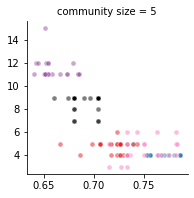

In [29]:
palette = {"random": '#cccccc', "bin_rnd_01": '#ed7e17', "bin_rnd_001": '#1ba055', "gut_normal": '#000',"gut_impaired":'#377eb8',"gut_t2d":'#e41a1c',"gut_refseq":'#f781bf',"kefir": '#984ea3'}
g = sns.FacetGrid(subdf, col="community size", hue="type", height=3,hue_order=types, palette=palette)
g.map(plt.scatter, "Competition", "Cooperation", alpha=0.5, s=25, linewidths=0.7, edgecolors='w');
g.fig.subplots_adjust(top=0.9)
g.set_axis_labels('', '') 
g.savefig("../figures/fig_1a.png", dpi=300)

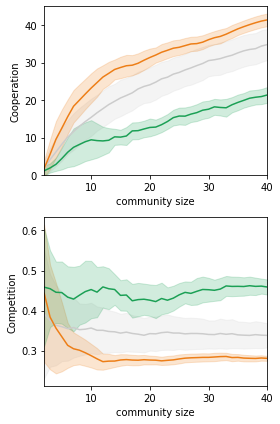

In [8]:
f, axs = plt.subplots(2,1, figsize=(4,6))
sns.lineplot(data=df, x="community size", y="mip", hue="type", ci="sd", palette=palette, legend=False, ax=axs[0])
sns.lineplot(data=df, x="community size", y="mro", hue="type", ci="sd", palette=palette, legend=False, ax=axs[1])

axs[0].set_xlim(2,40)
axs[0].set_ylim(0,45)
axs[0].set_ylabel("Cooperation")
axs[0].set_yticks([0, 10, 20, 30, 40])

axs[1].set_xlim(2,40)
axs[1].set_ylabel("Competition")
axs[1].set_yticks([0.3, 0.4, 0.5, 0.6])
plt.tight_layout()

plt.savefig("../figures/fig_1bc.png", dpi=300)